In [2]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Decision Tree

In [3]:
clf = DecisionTreeClassifier(min_samples_leaf= 3, random_state=1)
clf = clf.fit(wine_df, wine.target)
dtc_score = cross_val_score(clf, wine.data, wine.target, cv=5)
print(f"Decision tree scores: {dtc_score}")

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857]


In [4]:
X = wine.data
y = wine.target

skf = StratifiedKFold(n_splits=5)
cv = skf.get_n_splits(wine_df, wine.target)
scores = []
for train_index,test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
print(f"Decision tree accuracy: {np.mean(scores)}")

Decision tree accuracy: 0.8882539682539681


# Bagging

In [5]:
bagging =  BaggingClassifier(base_estimator = clf, random_state=1, n_estimators=50)
bagging_score = cross_val_score(bagging, wine.data, wine.target, cv=5)
print(f"Bagging scores: {bagging_score}")

Bagging scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ]


In [6]:
scores = []
for train_index,test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bagging.fit(X_train,y_train)
    scores.append(bagging.score(X_test,y_test))
print(f"Bagging accuracy: {np.mean(scores)}")

Bagging accuracy: 0.9498412698412698


# AdaBoost

In [7]:
adaBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, random_state=1), random_state=1, n_estimators=50, algorithm='SAMME')
adaBoost_score = cross_val_score(adaBoost, wine.data, wine.target, cv=5)
print(f"AdaBoost scores: {adaBoost_score}")

AdaBoost scores: [0.83333333 0.91666667 0.91666667 1.         1.        ]


In [8]:
scores = []
for train_index,test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    adaBoost.fit(X_train,y_train)
    scores.append(adaBoost.score(X_test,y_test))
print(f"AdaBoost accuracy: {np.mean(scores)}")

AdaBoost accuracy: 0.9333333333333332


# Gradient boosting

In [9]:
gradientBoosting = GradientBoostingClassifier(n_estimators=50, max_depth=1, learning_rate=1, random_state=1, subsample=0.5, min_samples_leaf=3)
gradientBoosting_score = cross_val_score(gradientBoosting, wine.data, wine.target, cv=5)
print(f"Gradient boosting scores: {gradientBoosting_score}")

Gradient boosting scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857]


In [10]:
scores = []
for train_index,test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gradientBoosting.fit(X_train,y_train)
    scores.append(gradientBoosting.score(X_test,y_test))
print(f"Gradient boosting accuracy: {np.mean(scores)}")

Gradient boosting accuracy: 0.8522222222222222


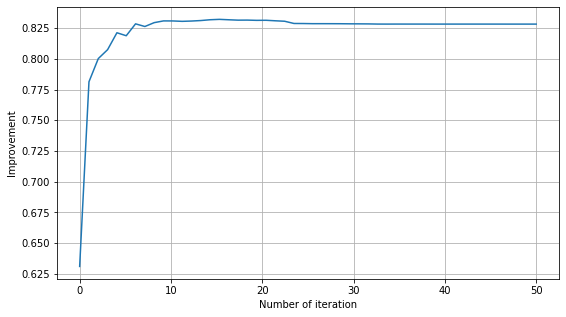

In [11]:
cumsum = np.cumsum(gradientBoosting.oob_improvement_)
plt.figure(figsize=(9,5))
x_val = np.linspace(0,len(cumsum), 50)
plt.plot(x_val, cumsum)
plt.xlabel("Number of iteration")
plt.ylabel("Improvement")
plt.grid()
plt.show()

After 8th iteration Gradient Boosting model yields almost no further improvement 